1. IMPORTING MODULES

In [1]:
#importing modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
from datetime import datetime

In [2]:
#importing actual data file in csv extension
actual_data_df = pd.read_csv("actual_data_pg.csv")      

In [3]:
actual_data_df.head()

,Month and Year,Thermal,Nuclear,Hydro,BHUTAN IMP_Hydro,Renewable,Total Power Generation
0,Feb-2019<br>All India,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261
1,Mar-2019<br>All India,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345
2,Apr-2019<br>All India,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904
3,Jul-2019<br>All India,87.37192,4.38228,15.77735,NaN,NaN,107.53155
4,Aug-2019<br>All India,80.78213,4.30232,19.92838,NaN,NaN,105.01283


2. DATA CLEANING

------>Replacing NaN/Null values with 0 since actual dataset doesn't contain values at those positions

In [4]:
actual_data_df.fillna(0, inplace = True)
actual_data_df.head()

,Month and Year,Thermal,Nuclear,Hydro,BHUTAN IMP_Hydro,Renewable,Total Power Generation
0,Feb-2019<br>All India,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261
1,Mar-2019<br>All India,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345
2,Apr-2019<br>All India,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904
3,Jul-2019<br>All India,87.37192,4.38228,15.77735,0.00000,0.00000,107.53155
4,Aug-2019<br>All India,80.78213,4.30232,19.92838,0.00000,0.00000,105.01283


In [5]:
actual_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month and Year          58 non-null     object 
 1   Thermal                 58 non-null     float64
 2   Nuclear                 58 non-null     float64
 3   Hydro                   58 non-null     float64
 4   BHUTAN IMP_Hydro        58 non-null     float64
 5   Renewable               58 non-null     float64
 6   Total Power Generation  58 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.3+ KB


In [6]:
actual_data_df.sum()

TypeError: can only concatenate str (not "int") to str

In [7]:
ThermalGeneration_mean = actual_data_df['Thermal'].mean()
NuclearGeneration_mean = actual_data_df['Nuclear'].mean()
HydroGeneration_mean = actual_data_df['Hydro'].mean()
ImportedGeneration_mean = actual_data_df['BHUTAN IMP_Hydro'].mean()
RenewableGeneration_mean = actual_data_df['Renewable'].mean()

------>Changing column names as it is easy to sort and filter out.

In [8]:
actual_data_df = actual_data_df.rename(columns={'Month and Year': 'month_and_year'})
actual_data_df = actual_data_df.rename(columns={'BHUTAN IMP_Hydro': 'BHUTAN_IMP_Hydro'})
actual_data_df = actual_data_df.rename(columns={'Total Power Generation': 'Total_Power_Generation'})
actual_data_df.head()

,month_and_year,Thermal,Nuclear,Hydro,BHUTAN_IMP_Hydro,Renewable,Total_Power_Generation
0,Feb-2019<br>All India,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261
1,Mar-2019<br>All India,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345
2,Apr-2019<br>All India,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904
3,Jul-2019<br>All India,87.37192,4.38228,15.77735,0.00000,0.00000,107.53155
4,Aug-2019<br>All India,80.78213,4.30232,19.92838,0.00000,0.00000,105.01283


In [9]:
def year_seggregator(month_and_year):
    if '2019' in month_and_year:
        return '2019'
    elif '2020' in month_and_year:
        return '2020'
    elif '2021' in month_and_year:
        return '2021'
    elif '2022' in month_and_year:
        return '2022'
    elif '2023' in month_and_year:
        return '2023'
    else:
        return 'Others'
def month_seggregator(month_and_year):
    if 'Jan' in month_and_year:
        return 'January'
    if 'Feb' in month_and_year:
        return 'February'
    if 'Mar' in month_and_year:
        return 'March'
    if 'Apr' in month_and_year:
        return 'April'
    if 'May' in month_and_year:
        return 'May'
    if 'Jun' in month_and_year:
        return 'June'
    if 'Jul' in month_and_year:
        return 'July'
    if 'Aug' in month_and_year:
        return 'August'
    if 'Sep' in month_and_year:
        return 'September'
    if 'Oct' in month_and_year:
        return 'October'
    if 'Nov' in month_and_year:
        return 'November'
    if 'Dec' in month_and_year:
        return 'December'
    else:
        return 'others'

In [10]:
actual_data_df['Annual'] = actual_data_df['month_and_year'].apply(lambda x:np.int_(year_seggregator(x)))
actual_data_df.value_counts('Annual')

TypeError: argument of type 'int' is not iterable

In [11]:
actual_data_df['Monthly'] = actual_data_df['month_and_year'].apply(lambda y:(month_seggregator(y)))
actual_data_df.value_counts('Monthly')

TypeError: argument of type 'int' is not iterable

In [ ]:
actual_data_df.head(5)

,month_and_year,Thermal,Nuclear,Hydro,BHUTAN_IMP_Hydro,Renewable,Total_Power_Generation,Annual,Monthly
0,Feb-2019<br>All India,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261,2019,February
1,Mar-2019<br>All India,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345,2019,March
2,Apr-2019<br>All India,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904,2019,April
3,Jul-2019<br>All India,87.37192,4.38228,15.77735,0.00000,0.00000,107.53155,2019,July
4,Aug-2019<br>All India,80.78213,4.30232,19.92838,0.00000,0.00000,105.01283,2019,August


------>Checking Data Types

In [ ]:
actual_data_df.dtypes

month_and_year             object
Thermal                   float64
Nuclear                   float64
Hydro                     float64
BHUTAN_IMP_Hydro          float64
Renewable                 float64
Total_Power_Generation    float64
Annual                      int32
Monthly                    object
dtype: object

------>Finding the total Power Generation year wise : 2019

In [ ]:
# Filter rows where the 'Annual' column has the value 2019
year_2019 = actual_data_df[actual_data_df['Annual'] == 2019]

# Calculate the sum of each column
gen_2019 = year_2019.drop(columns='Annual').sum()

print("Sum of individual columns where 'Annual' is 2019:")
print(gen_2019)

Sum of individual columns where 'Annual' is 2019:
month_and_year            Feb-2019<br>All IndiaMar-2019<br>All IndiaApr-...
Thermal                                                           731.03002
Nuclear                                                             35.7735
Hydro                                                             117.72773
BHUTAN_IMP_Hydro                                                    0.43258
Renewable                                                          33.17945
Total_Power_Generation                                            918.14328
Monthly                   FebruaryMarchAprilJulyAugustSeptemberOctoberNo...
dtype: object


------>Finding the total Power Generation year wise : 2020

In [ ]:
# Filter rows where the 'Annual' column has the value 2020
year_2020 = actual_data_df[actual_data_df['Annual'] == 2020]

# Calculate the sum of each column
gen_2020 = year_2020.drop(columns='Annual').sum()

print("Sum of individual columns where 'Annual' is 2020:")
print(gen_2020)

Sum of individual columns where 'Annual' is 2020:
month_and_year            Jan-2020<br>All IndiaFeb-2020<br>All IndiaMar-...
Thermal                                                           999.83336
Nuclear                                                            44.61314
Hydro                                                             152.83573
BHUTAN_IMP_Hydro                                                        0.0
Renewable                                                               0.0
Total_Power_Generation                                           1197.28223
Monthly                   JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
dtype: object


------>Finding the total Power Generation year wise : 2021

In [ ]:
# Filter rows where the 'Annual' column has the value 2021
year_2021 = actual_data_df[actual_data_df['Annual'] == 2021]

# Calculate the sum of each column
gen_2021 = year_2021.drop(columns='Annual').sum()

print("Sum of individual columns where 'Annual' is 2021:")
print(gen_2021)

Sum of individual columns where 'Annual' is 2021:
month_and_year            Jan-2021<br>All IndiaFeb-2021<br>All IndiaMar-...
Thermal                                                          1112.32572
Nuclear                                                            43.91795
Hydro                                                             149.76762
BHUTAN_IMP_Hydro                                                        0.0
Renewable                                                               0.0
Total_Power_Generation                                           1306.01129
Monthly                   JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
dtype: object


------>Finding the total Power Generation year wise : 2022

In [ ]:
# Filter rows where the 'Annual' column has the value 2022
year_2022 = actual_data_df[actual_data_df['Annual'] == 2022]

# Calculate the sum of each column
gen_2022 = year_2022.drop(columns='Annual').sum()

print("Sum of individual columns where 'Annual' is 2022:")
print(gen_2022)

Sum of individual columns where 'Annual' is 2022:
month_and_year            Jan-2022<br>All IndiaFeb-2022<br>All IndiaMar-...
Thermal                                                           1190.0746
Nuclear                                                            46.19468
Hydro                                                             163.41791
BHUTAN_IMP_Hydro                                                        0.0
Renewable                                                               0.0
Total_Power_Generation                                           1399.68719
Monthly                   JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
dtype: object


------>Finding the total Power Generation year wise : 2023

In [ ]:
# Filter rows where the 'Annual' column has the value 2023
year_2023 = actual_data_df[actual_data_df['Annual'] == 2023]

# Calculate the sum of each column
gen_2023 = year_2023.drop(columns='Annual').sum()
print("Sum of individual columns where 'Annual' is 2023:")
print(gen_2023)

Sum of individual columns where 'Annual' is 2023:
month_and_year            Jan-2023<br>All IndiaFeb-2023<br>All IndiaMar-...
Thermal                                                          1294.90827
Nuclear                                                            48.20443
Hydro                                                             138.95293
BHUTAN_IMP_Hydro                                                        0.0
Renewable                                                               0.0
Total_Power_Generation                                           1482.06563
Monthly                   JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
dtype: object


----------->Finding the individual Month source generation in 4 years

In [ ]:
actual_data_df['Monthly'].dtypes

dtype('O')

In [ ]:
Jan_mon = actual_data_df[actual_data_df['Monthly'] == 'January']
Feb_mon = actual_data_df[actual_data_df['Monthly'] == 'February']
Mar_mon = actual_data_df[actual_data_df['Monthly'] == 'March']
Apr_mon = actual_data_df[actual_data_df['Monthly'] == 'April']
May_mon = actual_data_df[actual_data_df['Monthly'] == 'May']
Jun_mon = actual_data_df[actual_data_df['Monthly'] == 'June']
Jul_mon = actual_data_df[actual_data_df['Monthly'] == 'July']
Aug_mon = actual_data_df[actual_data_df['Monthly'] == 'August']
Sep_mon = actual_data_df[actual_data_df['Monthly'] == 'September']
Oct_mon = actual_data_df[actual_data_df['Monthly'] == 'October']
Nov_mon = actual_data_df[actual_data_df['Monthly'] == 'November']
Dec_mon = actual_data_df[actual_data_df['Monthly'] == 'December']


In [ ]:
gen_Jan = Jan_mon['Total_Power_Generation'].sum()
gen_Feb = Feb_mon['Total_Power_Generation'].sum()
gen_Mar = Mar_mon['Total_Power_Generation'].sum()
gen_Apr = Apr_mon['Total_Power_Generation'].sum()
gen_May = May_mon['Total_Power_Generation'].sum()
gen_Jun = Jun_mon['Total_Power_Generation'].sum()
gen_Jul = Jul_mon['Total_Power_Generation'].sum()
gen_Aug = Aug_mon['Total_Power_Generation'].sum()
#gen_Sep = Sep_mon['Total_Power_Generation'].sum() error in data type attribute
gen_Sep = 568.1267
gen_Oct = Oct_mon['Total_Power_Generation'].sum()
gen_Nov = Nov_mon['Total_Power_Generation'].sum()
gen_Dec = Dec_mon['Total_Power_Generation'].sum()

In [ ]:
print("January: ",gen_Jan)
print("February: ",gen_Feb)
print("March: ",gen_Mar)
print("April: ",gen_Apr)
print("May: ",gen_May)
print("June: ",gen_Jun)
print("July: ",gen_Jul)
print("August: ",gen_Aug)
print("September: ",gen_Sep)
print("October: ",gen_Oct)
print("November: ",gen_Nov)
print("December: ",gen_Dec)

January:  437.69711
February:  530.1289899999999
March:  565.89383
April:  538.25284
May:  450.26804000000004
June:  454.46162
July:  571.93724
August:  582.8453299999999
September:  568.1267
October:  556.46541
November:  507.53230999999994
December:  539.5802


In [ ]:
variables = [gen_Jan, gen_Feb, gen_Mar, gen_Apr, gen_May, gen_Jun, gen_Jul, gen_Aug, gen_Sep, gen_Oct, gen_Nov, gen_Dec]

# List of month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert each variable to a pandas DataFrame with the month name as index
datasets = [pd.DataFrame({'Total_Power_Generation': [var]}, index=[month]) for var, month in zip(variables, months)]

# Concatenate all datasets vertically
Month_Data = pd.concat(datasets, ignore_index=False)

# Display the combined dataset
print(Month_Data)


     Total_Power_Generation
Jan               437.69711
Feb               530.12899
Mar               565.89383
Apr               538.25284
May               450.26804
Jun               454.46162
Jul               571.93724
Aug               582.84533
Sep               568.12670
Oct               556.46541
Nov               507.53231
Dec               539.58020


----------->Finding the individual source generation in 4 years

In [ ]:
total_thermal_gen = actual_data_df['Thermal'].sum()
total_nuclear_gen = actual_data_df['Nuclear'].sum()
total_hydro_gen = actual_data_df['Hydro'].sum()
total_imported_gen = actual_data_df['BHUTAN_IMP_Hydro'].sum()
total_renewable_gen = actual_data_df['Renewable'].sum()
print("Thermal: ", total_thermal_gen)
print("Nuclear: ", total_nuclear_gen)
print("Hydro: ", total_hydro_gen)
print("Imported: ", total_imported_gen)
print("Renewable: ", total_renewable_gen)

Thermal:  5328.17197
Nuclear:  218.7037
Hydro:  722.7019200000001
Imported:  0.43258
Renewable:  33.17945


----------->Finding the total source generation in 4 years

In [ ]:
total_gen = actual_data_df['Total_Power_Generation'].sum()
print("Total Power Generation: ",total_gen)

Total Power Generation:  6303.18962


3. PLOTS: 

In [ ]:
actual_data_df.head(5)

,month_and_year,Thermal,Nuclear,Hydro,BHUTAN_IMP_Hydro,Renewable,Total_Power_Generation,Annual,Monthly
0,Feb-2019<br>All India,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261,2019,February
1,Mar-2019<br>All India,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345,2019,March
2,Apr-2019<br>All India,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904,2019,April
3,Jul-2019<br>All India,87.37192,4.38228,15.77735,0.00000,0.00000,107.53155,2019,July
4,Aug-2019<br>All India,80.78213,4.30232,19.92838,0.00000,0.00000,105.01283,2019,August


In [ ]:
fig = px.line(actual_data_df, x='Annual', y='Total_Power_Generation', title='Total Power Generation vs. Annual')
fig.show()

In [ ]:
fig = px.line(Month_Data, x=Month_Data.index, y='Total_Power_Generation', title='Total Power Generation for Each Month Over 2019~2023')
fig.show()

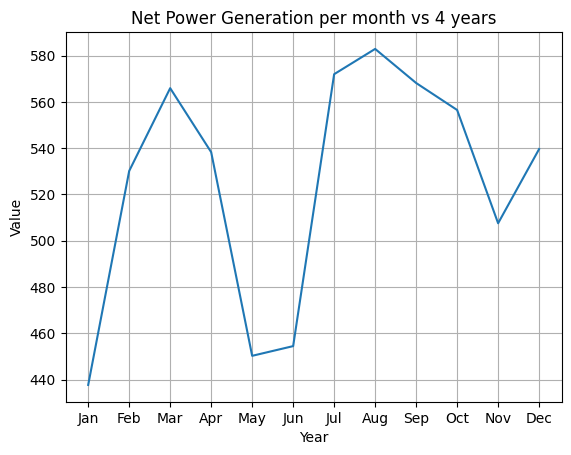

In [ ]:
plt.plot(Month_Data['Total_Power_Generation'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Net Power Generation per month vs 4 years')
plt.grid()
# Display the plot
plt.show()

In [ ]:
fig = px.line(year_2019, x='Monthly', y='Total_Power_Generation', title='Total Power Generation for the year 2019')
fig.show()

In [ ]:
fig = px.line(year_2020, x='Monthly', y='Total_Power_Generation', title='Total Power Generation for the year 2020')
fig.show()

In [ ]:
fig = px.line(year_2021, x='Monthly', y='Total_Power_Generation', title='Total Power Generation for the year 2021')
fig.show()

In [ ]:
fig = px.line(year_2022, x='Monthly', y='Total_Power_Generation', title='Total Power Generation for the year 2022')
fig.show()

In [ ]:
fig = px.line(year_2023, x='Monthly', y='Total_Power_Generation', title='Total Power Generation for the year 2023')
fig.show()

In [ ]:
fig = px.line()

# Add traces for each dataset
fig.add_scatter(x=year_2020['Monthly'], y=year_2020['Total_Power_Generation'], name='2020')
fig.add_scatter(x=year_2021['Monthly'], y=year_2021['Total_Power_Generation'], name='2021')
fig.add_scatter(x=year_2022['Monthly'], y=year_2022['Total_Power_Generation'], name='2022')
fig.add_scatter(x=year_2023['Monthly'], y=year_2023['Total_Power_Generation'], name='2023')
# Update layout if needed
fig.update_layout(title='Total Power Generation over the Years')

# Show the figure
fig.show()

In [ ]:
actual_data_df.head()

,month_and_year,Thermal,Nuclear,Hydro,BHUTAN_IMP_Hydro,Renewable,Total_Power_Generation,Annual,Monthly
0,Feb-2019<br>All India,89.30048,3.17291,8.43584,0.06820,11.24518,112.22261,2019,February
1,Mar-2019<br>All India,82.81242,4.05431,9.08989,0.10638,11.30045,107.36345,2019,March
2,Apr-2019<br>All India,66.80572,3.86008,10.12142,0.25800,10.63382,91.67904,2019,April
3,Jul-2019<br>All India,87.37192,4.38228,15.77735,0.00000,0.00000,107.53155,2019,July
4,Aug-2019<br>All India,80.78213,4.30232,19.92838,0.00000,0.00000,105.01283,2019,August


4. DATA MODEL: Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
df = actual_data_df[['Monthly', 'Annual', 'Total_Power_Generation']]
df.head()

,Monthly,Annual,Total_Power_Generation
0,February,2019,112.22261
1,March,2019,107.36345
2,April,2019,91.67904
3,July,2019,107.53155
4,August,2019,105.01283


In [ ]:
date_strings = [
    "Feb-2019", "Mar-2019", "Apr-2019", "Jul-2019", "Aug-2019", "Sep-2019", "Oct-2019", "Nov-2019", "Dec-2019",
    "Jan-2020", "Feb-2020", "Mar-2020", "Apr-2020", "May-2020", "Jun-2020", "Jul-2020", "Aug-2020", "Sep-2020",
    "Oct-2020", "Nov-2020", "Dec-2020", "Jan-2021", "Feb-2021", "Mar-2021", "Apr-2021", "May-2021", "Jun-2021",
    "Jul-2021", "Aug-2021", "Sep-2021", "Oct-2021", "Nov-2021", "Dec-2021", "Jan-2022", "Feb-2022", "Mar-2022",
    "Apr-2022", "May-2022", "Jun-2022", "Jul-2022", "Aug-2022", "Sep-2022", "Oct-2022", "Nov-2022", "Dec-2022",
    "Jan-2023", "Feb-2023", "Mar-2023", "Apr-2023", "May-2023", "Jun-2023", "Jul-2023", "Aug-2023", "Sep-2023",
    "Oct-2023", "Nov-2023", "Dec-2023"
]

# Convert each string to datetime object
date_objects = [datetime.strptime(date_str, "%b-%Y") for date_str in date_strings]

# Add the datetime objects as a new column to your existing DataFrame
df['Date_Object'] = date_objects
df = df[['Date_Object', 'Total_Power_Generation']]
df['Date_Object'] = pd.to_datetime(df['Date_Object'])
print(df)

   Date_Object  Total_Power_Generation
0   2019-02-01               112.22261
1   2019-03-01               107.36345
2   2019-04-01                91.67904
3   2019-07-01               107.53155
4   2019-08-01               105.01283
5   2019-09-01               103.99120
6   2019-10-01                98.06368
7   2019-11-01                93.34629
8   2019-12-01                98.93263
9   2020-01-01               102.90556
10  2020-02-01               100.90923
11  2020-03-01                95.95662
12  2020-04-01                80.78722
13  2020-05-01                95.71742
14  2020-06-01                98.92772
15  2020-07-01               106.72819
16  2020-08-01               101.57431
17  2020-09-01               108.76015
18  2020-10-01               106.76789
19  2020-11-01                94.78312
20  2020-12-01               103.46480
21  2021-01-01               108.36976
22  2021-02-01               101.32039
23  2021-03-01               118.64117
24  2021-04-01           

C:\Users\adity\AppData\Local\Temp\ipykernel_12488\999668157.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.to_csv('clean_data.csv', index=False)

In [ ]:
df.head()

,Date_Object,Total_Power_Generation
0,2019-02-01,112.22261
1,2019-03-01,107.36345
2,2019-04-01,91.67904
3,2019-07-01,107.53155
4,2019-08-01,105.01283


In [ ]:
#testing for stationarity
test_result = adfuller(df[['Total_Power_Generation']])
#adfuller stands for dicker fuller test used particularly in time series data set. It is a hypothesis testing

In [ ]:
#H0: Data is non stationary
def adfuller_test(Total_Power_Generation):
    result = adfuller(Total_Power_Generation)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis(H0), reject null hypothesis. Data has no unit root and is stationery")
    else:
        print("Weak evidence against null hypothesis(H0). Time series has a unit root indicating that it is non stationary")

In [ ]:
adfuller_test(df['Total_Power_Generation'])

ADF Test Statistic : -2.833271123868754
p-value : 0.05367613976602283
#Lags Used : 0
Number of observations used : 56
Weak evidence against null hypothesis(H0). Time series has a unit root indicating that it is non stationary


------>Differencing of data

In [ ]:
df['Generation First Difference'] = df['Total_Power_Generation'] - df['Total_Power_Generation'].shift(1)

In [ ]:
df['Total_Power_Generation'].shift(1)

0           NaN
1     112.22261
2     107.36345
3      91.67904
4     107.53155
5     105.01283
6     103.99120
7      98.06368
8      93.34629
9      98.93263
10    102.90556
11    100.90923
12     95.95662
13     80.78722
14     95.71742
15     98.92772
16    106.72819
17    101.57431
18    108.76015
19    106.76789
20     94.78312
21    103.46480
22    108.36976
23    101.32039
24    118.64117
25    115.32670
26    103.25895
27    105.33820
28    114.78516
29    119.64176
30    106.98126
31    110.05770
32     96.47723
33    105.81301
34    107.84601
35    104.17631
36    123.75158
37    126.64498
38    124.82180
39    123.43167
40    117.83792
41    120.22088
42    118.72502
43    108.58351
44    108.21292
45    115.43459
46    118.57578
47    111.50045
48    120.18101
49    123.81490
50    126.46987
51    126.76403
52    125.05442
53    136.39555
54    129.66907
55    132.99263
56    114.71275
Name: Total_Power_Generation, dtype: float64

In [ ]:
df['Seasonal First Difference'] = df['Total_Power_Generation'] - df['Total_Power_Generation'].shift(12)

In [ ]:
df['Total_Power_Generation'].shift(12)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12    112.22261
13    107.36345
14     91.67904
15    107.53155
16    105.01283
17    103.99120
18     98.06368
19     93.34629
20     98.93263
21    102.90556
22    100.90923
23     95.95662
24     80.78722
25     95.71742
26     98.92772
27    106.72819
28    101.57431
29    108.76015
30    106.76789
31     94.78312
32    103.46480
33    108.36976
34    101.32039
35    118.64117
36    115.32670
37    103.25895
38    105.33820
39    114.78516
40    119.64176
41    106.98126
42    110.05770
43     96.47723
44    105.81301
45    107.84601
46    104.17631
47    123.75158
48    126.64498
49    124.82180
50    123.43167
51    117.83792
52    120.22088
53    118.72502
54    108.58351
55    108.21292
56    115.43459
Name: Total_Power_Generation, dtype: float64

#shifting one record down and shifting 12 records down

In [ ]:
df.head(14)

,Date_Object,Total_Power_Generation,Generation First Difference,Seasonal First Difference
0,2019-02-01,112.22261,NaN,NaN
1,2019-03-01,107.36345,-4.85916,NaN
2,2019-04-01,91.67904,-15.68441,NaN
3,2019-07-01,107.53155,15.85251,NaN
4,2019-08-01,105.01283,-2.51872,NaN
5,2019-09-01,103.99120,-1.02163,NaN
6,2019-10-01,98.06368,-5.92752,NaN
7,2019-11-01,93.34629,-4.71739,NaN
8,2019-12-01,98.93263,5.58634,NaN
9,2020-01-01,102.90556,3.97293,NaN


In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.558620683455485
p-value : 1.560145951079453e-06
#Lags Used : 0
Number of observations used : 44
Strong evidence against null hypothesis(H0), reject null hypothesis. Data has no unit root and is stationery


<Axes: >

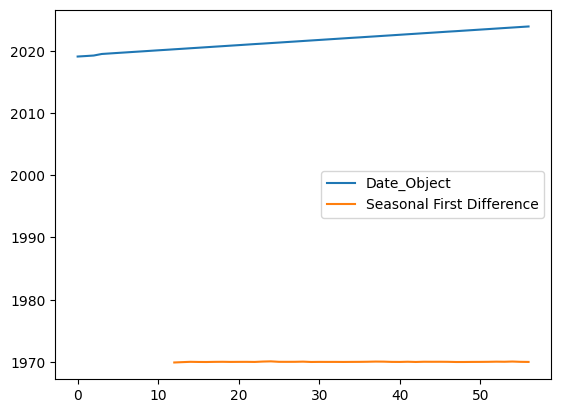

In [ ]:
df[['Date_Object','Seasonal First Difference']].plot()

------>The graph is almost stationery meaning, all values are almost concentrated around 0 to 30.

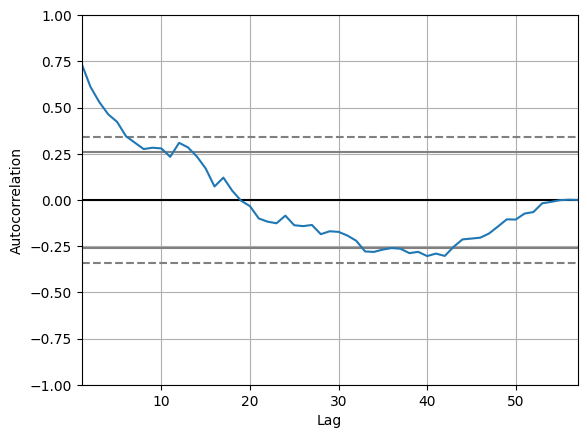

In [ ]:
autocorrelation_plot(df['Total_Power_Generation'])
plt.show()

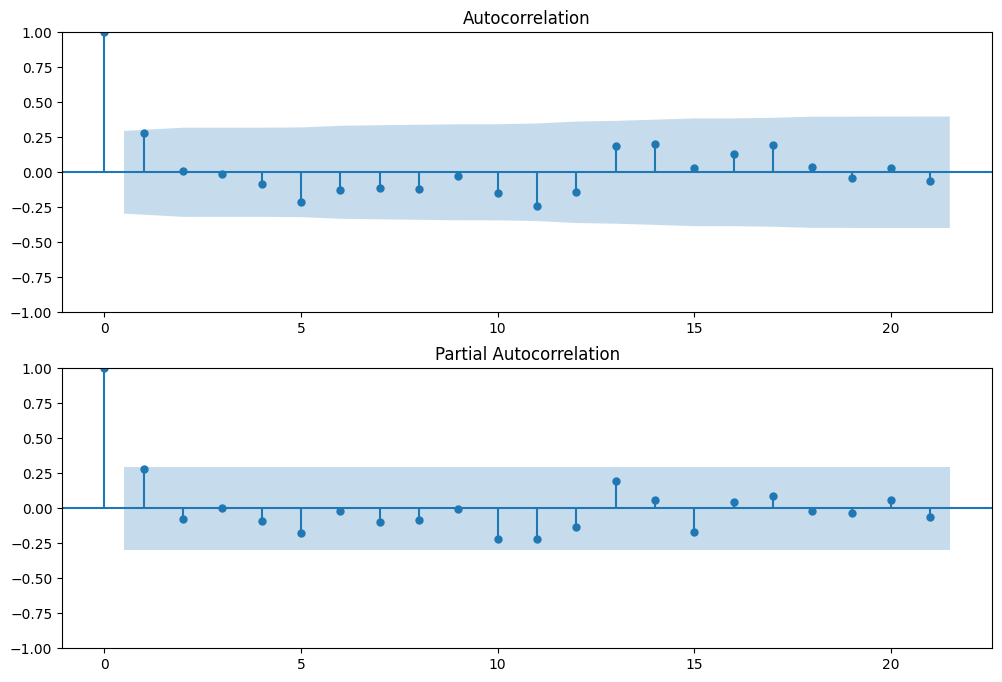

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=21,ax=ax2)

We have an exponential decrease in auto corelation, where is in partial autocorelation, we have an initial shut down, and then the value juggling around -0.25 to +0.25

--->AR value is now one, since the first shift within range, so it shuts down after 1st value.
p = 1, d = 1, q = 1

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Total_Power_Generation'],order=(2,1,5),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



here order=(p,d,q)

<Axes: >

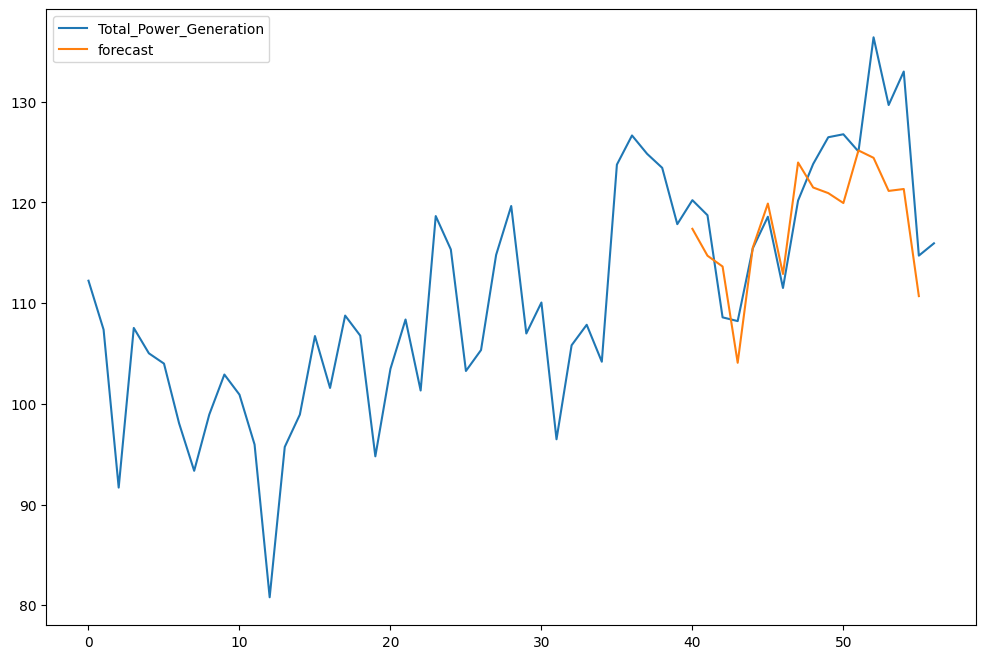

In [ ]:
df['forecast'] = results.predict(start=40,end = 55,dynamic=True)        #25 to 45 is index postions of the the total power generation
df[['Total_Power_Generation','forecast']].plot(figsize=(12,8))

In [ ]:
future_dates = [df['Date_Object'].iloc[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Date_Object,Total_Power_Generation,Generation First Difference,Seasonal First Difference,forecast
2025-07-01,NaN,NaN,NaN,NaN,NaN
2025-08-01,NaN,NaN,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN,NaN,NaN
2025-11-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_datest_df.dtypes

Date_Object                    object
Total_Power_Generation         object
Generation First Difference    object
Seasonal First Difference      object
forecast                       object
dtype: object

In [ ]:
future_df = pd.concat([df,future_datest_df])

C:\Users\adity\AppData\Local\Temp\ipykernel_12488\1881016157.py:1: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



<Axes: >

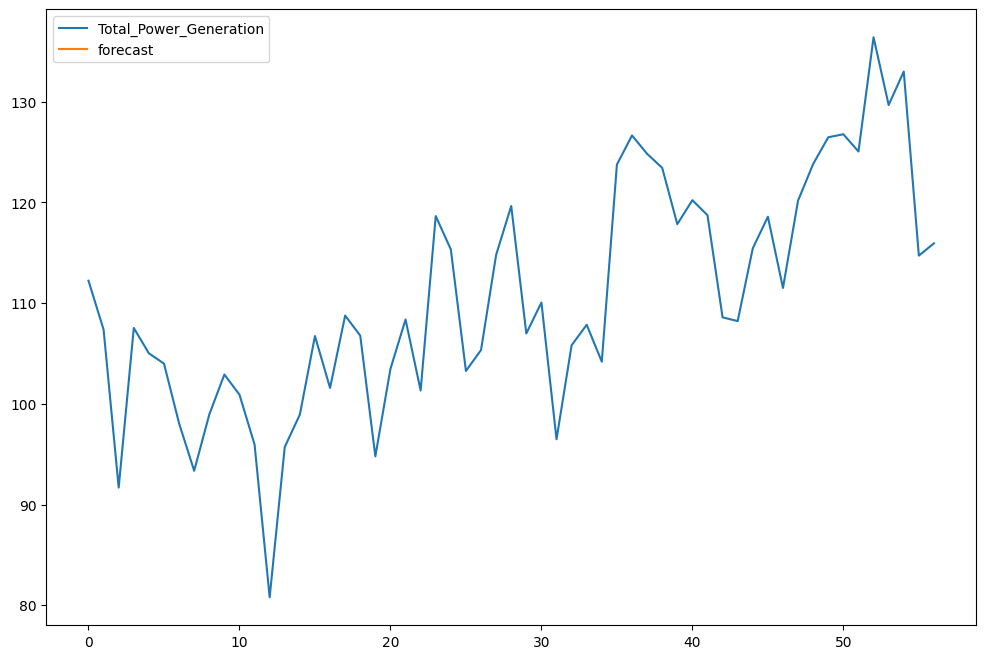

In [ ]:
future_df['forecast'] = results.predict(start = 56, end = 79, dynamic = True)
future_df[['Total_Power_Generation', 'forecast']].plot(figsize=(12,8))
